## Name- Devshekhar Pattnaik

## Reg No-19BCE1292

## Slot-L19-20


# <center> Web Mining Lab-12 </center>

<br>

### Importing Libraries

In [3]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import numpy as np
import gensim
from gensim import corpora

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DEVSHEKHAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DEVSHEKHAR\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
D1='I want to watch a movie this weekend.'
D2='I went shopping yesterday. New Zealand won the World Test Championship by beating India by eight wickets at Southampton.'
D3='I don’t watch cricket. Netflix and Amazon Prime have very good movies to watch.'
D4='Movies are a nice way to chill however, this time I would like to paint and read some good books. It’s been so long!'
D5='This blueberry milkshake is so good! Try reading Dr. Joe Dispenza’s books. His work is such a game-changer! His books helped to learn so much about how our thoughts impact our biology and how we can all rewire our brains.'
corpus = [D1, D2, D3, D4, D5]
corpus

['I want to watch a movie this weekend.',
 'I went shopping yesterday. New Zealand won the World Test Championship by beating India by eight wickets at Southampton.',
 'I don’t watch cricket. Netflix and Amazon Prime have very good movies to watch.',
 'Movies are a nice way to chill however, this time I would like to paint and read some good books. It’s been so long!',
 'This blueberry milkshake is so good! Try reading Dr. Joe Dispenza’s books. His work is such a game-changer! His books helped to learn so much about how our thoughts impact our biology and how we can all rewire our brains.']

### Text Preprocessing

In [7]:
# stop loss words
stop = set(stopwords.words('english'))

# punctuation
exclude = set(string.punctuation)

# lemmatization
lemma = WordNetLemmatizer()

# One function for all the steps:
def clean(doc):
    
    # convert text into lower case + split into words
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    
    # remove any stop words present
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    
    # remove punctuations + normalize the text
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    
    return normalized

# clean data stored in a new list
clean_corpus = [clean(doc).split() for doc in corpus]

print(clean_corpus)

[['want', 'watch', 'movie', 'weekend'], ['went', 'shopping', 'yesterday', 'new', 'zealand', 'world', 'test', 'championship', 'beating', 'india', 'eight', 'wicket', 'southampton'], ['don’t', 'watch', 'cricket', 'netflix', 'amazon', 'prime', 'good', 'movie', 'watch'], ['movie', 'nice', 'way', 'chill', 'however', 'time', 'would', 'like', 'paint', 'read', 'good', 'book', 'it’s', 'long'], ['blueberry', 'milkshake', 'good', 'try', 'reading', 'dr', 'joe', 'dispenza’s', 'book', 'work', 'gamechanger', 'book', 'helped', 'learn', 'much', 'thought', 'impact', 'biology', 'rewire', 'brain']]


### Creating Document Term Matrix

In [8]:
dict_= corpora.Dictionary(clean_corpus)
print(dict_)

Dictionary(52 unique tokens: ['movie', 'want', 'watch', 'weekend', 'beating']...)


In [9]:
doc_term_matrix = [dict_.doc2bow(i) for i in clean_corpus]
doc_term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1)],
 [(0, 1), (2, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)],
 [(0, 1),
  (20, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1)],
 [(20, 1),
  (23, 2),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1)]]

### Implementation of LDA

In [10]:
Lda = gensim.models.ldamodel.LdaModel
num_topics=6
ldamodel = Lda(doc_term_matrix, num_topics=num_topics, id2word = dict_, passes=1, random_state=0, eval_every=None)

### Extracting Topics from the Corpus

In [11]:
for i,topic in ldamodel.show_topics(formatted=True, num_topics=num_topics, num_words=8):
    print(str(i)+": "+ topic)
    print()

0: 0.136*"watch" + 0.084*"movie" + 0.060*"good" + 0.060*"amazon" + 0.060*"netflix" + 0.060*"prime" + 0.060*"cricket" + 0.060*"don’t"

1: 0.074*"weekend" + 0.070*"want" + 0.065*"movie" + 0.063*"watch" + 0.015*"don’t" + 0.015*"good" + 0.015*"book" + 0.015*"cricket"

2: 0.052*"book" + 0.028*"good" + 0.028*"blueberry" + 0.028*"try" + 0.028*"helped" + 0.028*"reading" + 0.028*"joe" + 0.028*"work"

3: 0.020*"championship" + 0.020*"wicket" + 0.020*"southampton" + 0.020*"yesterday" + 0.020*"went" + 0.020*"india" + 0.020*"shopping" + 0.020*"new"

4: 0.051*"movie" + 0.051*"book" + 0.051*"paint" + 0.051*"long" + 0.051*"like" + 0.051*"read" + 0.051*"time" + 0.051*"chill"

5: 0.019*"weekend" + 0.019*"watch" + 0.019*"movie" + 0.019*"good" + 0.019*"want" + 0.019*"don’t" + 0.019*"book" + 0.019*"cricket"



### Assigning the topics to the documents

In [12]:
count = 0
for i in ldamodel[doc_term_matrix]:
    print("doc : ",count,i)
    count += 1

doc :  0 [(0, 0.28222796), (1, 0.5843408), (2, 0.033334), (3, 0.033336144), (4, 0.033424955), (5, 0.033336177)]
doc :  1 [(0, 0.011905565), (1, 0.011906154), (2, 0.94046915), (3, 0.011907186), (4, 0.011905455), (5, 0.011906532)]
doc :  2 [(0, 0.91660583), (1, 0.016687142), (2, 0.016676303), (3, 0.01666756), (4, 0.016695531), (5, 0.016667573)]
doc :  3 [(0, 0.011138699), (1, 0.011119543), (2, 0.01112717), (3, 0.011111963), (4, 0.94439065), (5, 0.011111974)]
doc :  4 [(2, 0.9602892)]


### Word Clouds of Top N Keywords in Each Topic

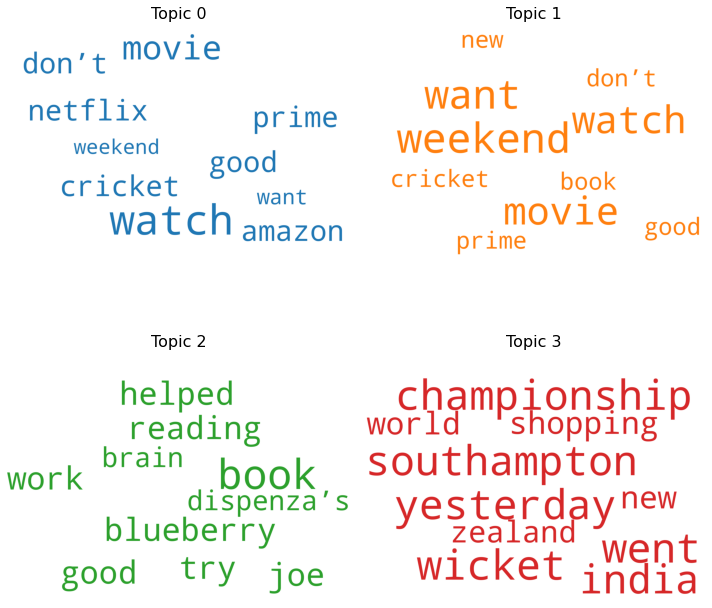

In [15]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()] # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### Inference

The five documents are assigned the topics with the weightage that will help to tell which is the dominant topic for the respective document.
From above can see:
1. Document 1 has the highest weight of 58.4% for Topic 2.
2. Topic 3 dominates the document 2 having the weightage of 94%. Similarly, 1st topic is the main topic for document 3 with ~92% weight.
3. Document 3 is influenced by the Topic 5 with 94% and Topic 4 rules the document 5.